<h1 align="center"> Assignment 7 </h1>

Link to runnable .ipynb file: https://github.com/Vortriz/MTH407/blob/main/labs/7/lab7.ipynb

In [45]:
using StatsPlots
using Graphs
using GraphPlot
using ColorSchemes
using DataFrames
using LaTeXStrings

### 1. Implement the three methods (standard, dynamic, powering) for Fibonacci numbers and compare the time complexity.

#### a. Standard Method

In [ ]:
function fib_std(n)
    global count += 1

    if n == 0
        return 0
    elseif n == 1
        return 1
    else
        return fib_std(n-1) + fib_std(n-2)
    end
end

fib_std (generic function with 1 method)

#### b. Dynamic Method

In [ ]:
function fib_dyp(n)
    global count += 1

    try
        return known[n]
    catch
        known[n] = fib_dyp(n-1) + fib_dyp(n-2)
        return known[n]
    end
end

fib_dyp (generic function with 1 method)

#### c. Powering Method

In [ ]:
function mul(m1, m2)
    # global count += 1

    return m1 * m2
end

mul (generic function with 1 method)

In [ ]:
function pow(a, n)
    global count += 1

    if n == 0
        return [1 0; 0 1]
    end

    b = mul(a, a)
    c = pow(b, floor(Int, n/2))

    if iseven(n)
        return c
    else
        return mul(a, c)
    end
end

pow (generic function with 1 method)

In [ ]:
function fib_pow(n)
    return pow([1 1; 1 0], n)[1,2]
end

fib_pow (generic function with 1 method)

In [20]:
function fib_helper(f, n)
    global count = 0
    global known = Dict(0 => 1, 1 => 1)
    f(n)

    return count
end

fib_helper (generic function with 1 method)

In [21]:
fib_helper(fib_pow, 4)

4

In [47]:
algs = [fib_std, fib_dyp, fib_pow]
n = 1:40
df = DataFrame(std=Int[], dyp=Int[], pow=Int[])

for i in n
    push!(df, (std = fib_helper(fib_std, i),
               dyp = fib_helper(fib_dyp, i),
               pow = fib_helper(fib_pow, i)))
end

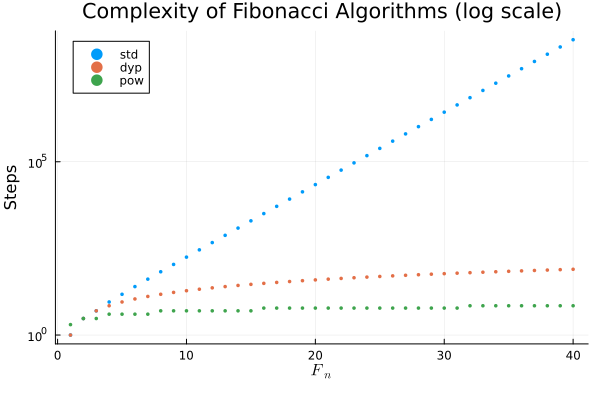

In [48]:
@df df scatter(cols(),
markersize=2, markerstrokewidth=0, legend=:topleft, yscale=:log10,
xlabel=L"F_n"*"\n", ylabel="Steps", title="Complexity of Fibonacci Algorithms (log scale)")

---

### 2. Implement backtracking for a simple puzzle of your choice.

Here, I have done the M-Coloring problem using backtracing. The M-Coloring problem states, we are given an undirected graph and $m$ number of different colors. We have to check if we can assign colors to the vertices of the graphs in such a way that no two adjacent vertices have the same color.

The approach is as follows:

- Starting from vertex 1, we will try to assign colors one by one to different nodes.
- However, before assigning, we have to check whether the color is safe or not. Color is not safe when adjacent vertices contain the same color.
- Next, we will check if is there any color assignment that satisfies the constraint. If it does, we mark that assignment as a solution to the M-Coloring problem.


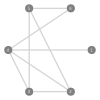

In [52]:
n = 6
e = 8
g = erdos_renyi(n, e, seed=234)
gplot(g, layout=shell_layout, nodelabel=1:n, nodelabelc="white", nodefillc="grey")

In [ ]:
function is_valid(colors, node, c)
    neighs = neighbors(g, node)
    neighs_colors = [get(colors, neigh, nothing) for neigh in neighs]
    return !(c in neighs_colors)
end

is_valid (generic function with 1 method)

In [ ]:
function graph_coloring(colors, max_colors, node)
    if node == n + 1
        return true, colors
    end

    for c in 1:max_colors
        if is_valid(colors, node, c)
            colors[node] = c

            ispossible, colors = graph_coloring(colors, max_colors, node+1)
            if ispossible
                return true, colors
            end
        end
    end

    return false, colors
end

graph_coloring (generic function with 1 method)

In [ ]:
function check_m_coloring(m)
    labels = Dict()

    ispossible, labels = graph_coloring(labels, m, 1)
    if !ispossible
        return "Not possible"
    end

    cs = ColorSchemes.tab10
    colors = map(x -> cs[x], last.(sort(collect(pairs(labels)), by=first)))

    return gplot(g, layout=shell_layout, nodelabel=1:n, nodelabelc="white", nodefillc=colors)
end

check_m_coloring (generic function with 1 method)

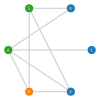

In [56]:
check_m_coloring(5)

---

### 3. Implement the basic operations for binary search trees.

In [ ]:
mutable struct BSTNode
    key::Int
    left::Union{Nothing, BSTNode}
    right::Union{Nothing, BSTNode}
end

@kwdef mutable struct BST
    root::Union{Nothing, BSTNode} = nothing
end

BST

In [ ]:
function bstconstruct(arr::Vector)
    tree = BST()

    for i in arr
        bstinsert!(tree, i)
    end

    return tree
end

bstconstruct (generic function with 1 method)

In [68]:
bst = bstconstruct([9,3,5,1,8,4,7,2,6,10])

BST(BSTNode(9, BSTNode(3, BSTNode(1, nothing, BSTNode(2, nothing, nothing)), BSTNode(5, BSTNode(4, nothing, nothing), BSTNode(8, BSTNode(7, BSTNode(6, nothing, nothing), nothing), nothing))), BSTNode(10, nothing, nothing)))

In [59]:
doesnotexist(v::BSTNode) = error("$key does not exist in the tree.")

doesnotexist (generic function with 1 method)

#### a. `bstsearch`

In [ ]:
function bstsearch(st::BST, key::Int)
    if isnothing(st.root)
        doesnotexist(key)
    else
        bstsearch(st.root, key)
    end
end

function bstsearch(st::BSTNode, key::Int)
    if key < st.key
        left_st = st.left

        if isnothing(left_st)
            doesnotexist(key)
        else
            bstsearch(left_st, key)
        end

    elseif key > st.key
        right_st = st.right

        if isnothing(right_st)
            doesnotexist(key)
        else
            bstsearch(right_st, key)
        end
    else
        return st
    end
end

bstsearch (generic function with 2 methods)

In [72]:
bstsearch(bst, 5) # gives the sub-tree of node with key 5

BSTNode(5, BSTNode(4, nothing, nothing), BSTNode(8, BSTNode(7, BSTNode(6, nothing, nothing), nothing), nothing))

#### b. `bstinsert`

In [ ]:
function bstinsert!(st::BST, key::Int)
    node = BSTNode(key, nothing, nothing)

    if isnothing(st.root)
        st.root = node
    else
        bstinsert!(st.root, node)
    end
end

function bstinsert!(st::BSTNode, node::BSTNode)
    if node.key < st.key
        if isnothing(st.left)
            st.left = node
        else
            bstinsert!(st.left, node)
        end

    elseif node.key > st.key
        if isnothing(st.right)
            st.right = node
        else
            bstinsert!(st.right, node)
        end

    elseif node.key == st.key
        error("$(node.key) already exists in the tree.")

    end
end

bstinsert! (generic function with 2 methods)

In [70]:
bstinsert!(bst, 11)

BSTNode(11, nothing, nothing)

#### c. `bstmin` and `bstmax`

In [63]:
bstmin(st::BST) = isnothing(st.root) ? error("Empty tree!") : bstmin(st.root)
bstmin(st::BSTNode) = !isnothing(st.left) ? bstmin(st.left) : st.key

bstmin (generic function with 2 methods)

In [73]:
bstmin(bst)

1

In [64]:
bstmax(st::BST) = isnothing(st.root) ? error("Empty tree!") : bstmax(st.root)
bstmax(st::BSTNode) = !isnothing(st.right) ? bstmax(st.right) : st.key

bstmax (generic function with 2 methods)

In [74]:
bstmax(bst)

11

#### d. `bstsucc` and `bstpred`

In [ ]:
function bstsucc(st::BST, key::Int)
    if isnothing(st.root)
        error("Empty tree!")
    else
        st = bstsearch(st, key)
        bstsucc(st)
    end
end

function bstsucc(st::BSTNode)
    if !isnothing(st.right)
        return bstmin(st.right)
    else
        return st.key
    end
end

bstsucc (generic function with 2 methods)

In [75]:
bstsucc(bst, 5)

6

In [ ]:
function bstpred(st::BST, key::Int)
    if isnothing(st.root)
        error("Empty tree!")
    else
        st = bstsearch(st, key)
        bstpred(st)
    end
end

function bstpred(st::BSTNode)
    if !isnothing(st.left)
        return bstmax(st.left)
    else
        return st.key
    end
end

bstpred (generic function with 2 methods)

In [78]:
bstpred(bst, 5)

4